# 1. Recolección de datos

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Carga de datasets elegidos:

In [66]:
# URLs de los datasets en Repo GITHUB
url_ansiedad = "https://raw.githubusercontent.com/lilali01299/Data-Science/refs/heads/main/anxiety_attack_dataset.csv"
url_compras = "https://raw.githubusercontent.com/lilali01299/Data-Science/refs/heads/main/shopping_trends.csv"
url_carreras = "https://raw.githubusercontent.com/lilali01299/Data-Science/refs/heads/main/education_career_success.csv"

# Carga en Pandas
df_ansiedad = pd.read_csv(url_ansiedad)
df_compras = pd.read_csv(url_compras)
df_carreras = pd.read_csv(url_carreras)

**Variables potencialmente interesantes**
Ansiedad dataset:
age
occupation
sleep hours
family history of anxiety

Compras dataset:
Item Purchased
Category
Review Rating
Shipping Type
Purchase Amount (USD)

Carreras dataset:
High_School_GPA
SAT_Score
Job_Offers
Starting_Salary

In [67]:
# Verificar las primeras filas
print(df_ansiedad.head())
print(df_compras.head())
print(df_carreras.head())

#RESUMEN NÚMERICO
df_compras.describe()

   ID  Age  Gender Occupation  Sleep Hours  Physical Activity (hrs/week)  \
0   1   56  Female      Other          9.6                           8.3   
1   2   46    Male    Teacher          6.4                           7.3   
2   3   32  Female     Doctor          6.9                           1.0   
3   4   60    Male     Doctor          9.2                           3.7   
4   5   25    Male    Student          9.2                           2.5   

   Caffeine Intake (mg/day)  Alcohol Consumption (drinks/week) Smoking  \
0                       175                                  6      No   
1                        97                                  6      No   
2                       467                                 14      No   
3                       471                                 16      No   
4                       364                                  2      No   

  Family History of Anxiety  Stress Level (1-10)  \
0                        No                   

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


# Gráfico número 1:

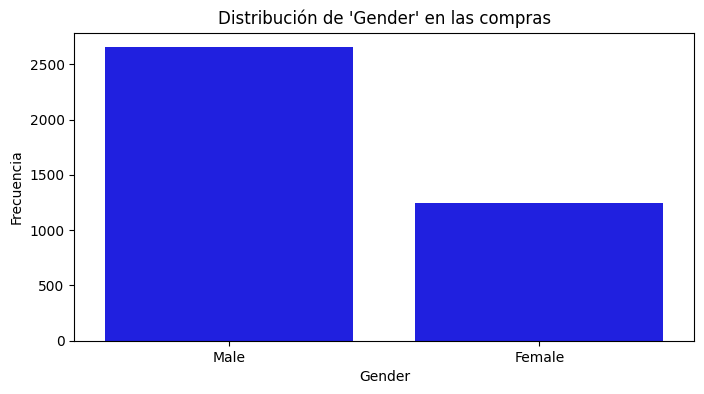

Gender
Male      2652
Female    1248
Name: count, dtype: int64
Gender
Male      0.68
Female    0.32
Name: proportion, dtype: float64


In [68]:
#ANÁLISIS UNIVARIADO
# Gráfico de barras de la variable Género
plt.figure(figsize=(8,4))
sns.countplot(x='Gender', data=df_compras, color='blue')
plt.title("Distribución de 'Gender' en las compras")
plt.xlabel("Gender")
plt.ylabel("Frecuencia")
plt.show()

print(df_compras['Gender'].value_counts())
print(df_compras['Gender'].value_counts(normalize=True))  # proporciones


En este gráfico donde estudiamos la "Distribución de 'Gender' en las compras".El gráfico indica que los hombres realizaron más compras que las mujeres, representando aproximadamente el 60% del total, mientras que el género femenino representa el 40% restante.
Vinculación con la hipótesis: podemos verificar que las mujeres no realizaron más compras que los hombres.Este tipo de distribución puede ser útil para la toma de decisiones estratégicas, como la segmentación de campañas de marketing o el diseño de productos dirigidos a públicos específicos.

# Gráfico número 2:

    Age  Purchase Amount (USD)
0    18                   4139
1    19                   4941
2    20                   3424
3    21                   4423
4    22                   4011
5    23                   4029
6    24                   4291
7    25                   5372
8    26                   4212
9    27                   4460
10   28                   5104
11   29                   4499
12   30                   4374
13   31                   4864
14   32                   4796
15   33                   3960
16   34                   3759
17   35                   4314
18   36                   4511
19   37                   4737
20   38                   4169
21   39                   4057
22   40                   4026
23   41                   5282
24   42                   4357
25   43                   4698
26   44                   3312
27   45                   4085
28   46                   4318
29   47                   4019
30   48                   3576
31   49 

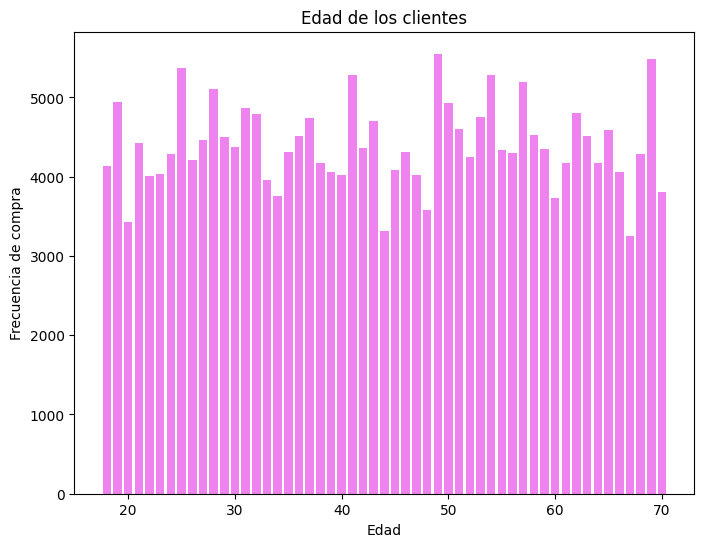

In [69]:
#ANÁLISIS BIVARIADO
# Calcula la edad de los clientes con más compras
edad_clientes_compras= df_compras.groupby("Age")["Purchase Amount (USD)"].sum().reset_index()
print(edad_clientes_compras)
# Gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(edad_clientes_compras["Age"], edad_clientes_compras["Purchase Amount (USD)"], color="violet")
plt.title('Edad de los clientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia de compra')
plt.show()

En el segundo gráfico "Edad de los clientes" queria verificar si los jóvenes compran más. El gráfico nos informa que no hay una gran diferencia en cuanto las compras y la edad de los clientes.
Se puede interpretar como resultado que las personas que compran más frecuentemente son aquellos que rondan los 50 y 70 años de edad.
Vinculación con la hipótesis: Se desmiente hipótesis de que los jóvenes son los que más realizan compras, podría ser interesante analizar si este grupo posee una mayor tasa de respuesta a las campañas de marketing que realizaron las tiendas en comparación con grupos más jóvenes o si tienen más poder adquisitivo como para realizar compras con más frecuencia.

# Gráfico número 3:

          Location  Purchase Amount (USD)
0          Alabama                   5261
1           Alaska                   4867
2          Arizona                   4326
3         Arkansas                   4828
4       California                   5605
5         Colorado                   4222
6      Connecticut                   4226
7         Delaware                   4758
8          Florida                   3798
9          Georgia                   4645
10          Hawaii                   3752
11           Idaho                   5587
12        Illinois                   5617
13         Indiana                   4655
14            Iowa                   4201
15          Kansas                   3437
16        Kentucky                   4402
17       Louisiana                   4848
18           Maine                   4388
19        Maryland                   4795
20   Massachusetts                   4384
21        Michigan                   4533
22       Minnesota                

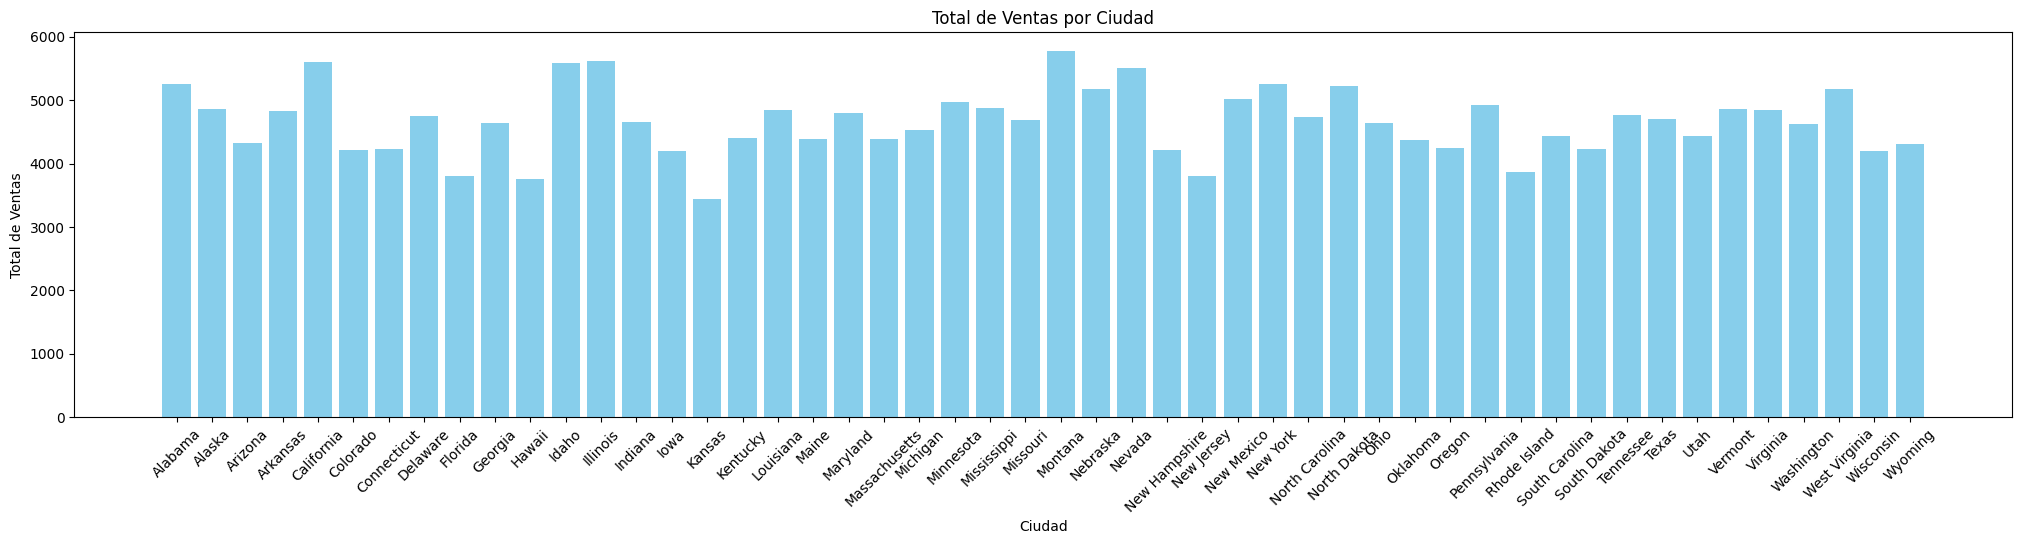

In [70]:

# Calcula la región con más compras
ventas_por_ciudad= df_compras.groupby("Location")["Purchase Amount (USD)"].sum().reset_index()
print(ventas_por_ciudad)

#Gráfico de barras II
plt.figure(figsize=(25,5))
plt.bar(ventas_por_ciudad["Location"], ventas_por_ciudad["Purchase Amount (USD)"], color="skyblue")
plt.xlabel("Ciudad")
plt.ylabel("Total de Ventas")
plt.title("Total de Ventas por Ciudad")
plt.xticks(rotation=45)
plt.show()

En este gráfico estudiamos el "Total de ventas por ciudad". Se puede verificar que las ciudades donde más ventas se realizan son Missouri e Illinois.
Vinculación con la hipótesis: Según el análisis del total de ventas por ciudad, Nueva York no es la ciudad con mayor volumen de compras. Otras regiones presentan un mayor gasto total. Esto refuta la hipótesis original y sugiere que la actividad económica relevante para la empresa podría estar concentrada en otras áreas urbanas. Sería útil analizar factores sociodemográficos o de mercado que expliquen este comportamiento.




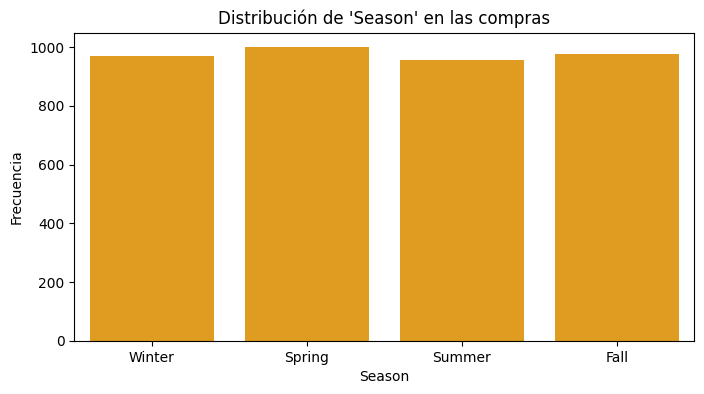

Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count, dtype: int64
Season
Spring    0.256154
Fall      0.250000
Winter    0.248974
Summer    0.244872
Name: proportion, dtype: float64


In [71]:
#ANÁLISIS UNIVARIADO
# Gráfico de barras de la variable Temporada
plt.figure(figsize=(8,4))
sns.countplot(x='Season', data=df_compras, color='orange')
plt.title("Distribución de 'Season' en las compras")
plt.xlabel("Season")
plt.ylabel("Frecuencia")
plt.show()

print(df_compras['Season'].value_counts())
print(df_compras['Season'].value_counts(normalize=True))  # proporciones

Estudiamos la "Distribución de 'Season' en las compras".El gráfico indica que si bien en las cuatro temporadas del año se realizaron compras con totales similares, una de ellas se destaco y fue la estación primavera, representando aproximadamente el 26% del total.
Vinculación con la hipótesis: podemos verificar que efectivamente en invierno se realizan menos compras pero no es la temporada con menos consumo, sino que esta es el verano.Este tipo de distribución puede ser útil para la toma de decisiones estratégicas, ya que se descubre que no siempre las estaciones principales (Verano e Invierno) son las que dan mejores resultados.

# Identificar valores nulos

In [72]:
# Calcular la cantidad de valores nulos por columna
null_values = df_compras.isnull().sum()
null_values

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


# Proyecto final

# 1. Objetivo del análisis



Identificar patrones de comportamiento de compra según variables demográficas, estacionales y comerciales, con el fin de optimizar las estrategias de ventas y mejorar la toma de decisiones comerciales.

**Preguntas clave**
1. ¿Las mujeres realmente compran más que los hombres?
Hipótesis:  Las mujeres suelen realizar más compras que los hombres ya que requieren de diferentes productos para producirse y se asume que tienen más posibilidad de acudir a tiendas.
2. ¿Cuál es la edad de los clientes que más compras realizaron?
Hipótesis: Se cree que los jóvenes son quienes realizan más compras ya que son más permeables a estilos como por ejemplo seguir tendencias y responder a publicidad en redes sociales.
3. ¿Cuál es la región en la que más compras se realizaron? Hipótesis: Entre las ciudades de Estados Unidos se prevee que la ciudad de New York tenga el público que más compras realiza. Esto se debe a la gran cantidad de recursos disponibles, lo plasmado en series o películas y al ser el lugar donde se realiza "La semana de la moda" en este país.
5. ¿Las compras varian según la época del año?
Hipótesis: En invierno las personas compran menos, esto se debe a que la indumentaria de esta estación es más costosa que el resto.




**Preguntas de interés. Dataset: Tendencias en compras**
1. ¿Las mujeres realmente compran más que los hombres?
Hipótesis:  Las mujeres suelen realizar más compras que los hombres ya que requieren de diferentes productos para producirse y se asume que tienen más posibilidad de acudir a tiendas.
2. ¿Cuál es la edad de los clientes que más compras realizaron?
Hipótesis: Se cree que los jóvenes son quienes realizan más compras ya que son más permeables a estilos como por ejemplo seguir tendencias y responder a publicidad en redes sociales.
3. ¿Cuál es la región en la que más compras se realizaron? Hipótesis: Entre las ciudades de Estados Unidos se prevee que la ciudad de New York tenga el público que más compras realiza. Esto se debe a la gran cantidad de recursos disponibles, lo plasmado en series o películas y al ser el lugar donde se realiza "La semana de la moda" en este país.
5. ¿Las compras varian según la época del año?
Hipótesis: En invierno las personas compran menos, esto se debe a que la indumentaria de esta estación es más costosa que el resto.

# 2. Contexto comercial

La empresa opera en distintas ciudades de Estados Unidos y ofrece productos a través de tiendas distribuidas en todo el país y múltiples métodos de pago. Las compras varían según la temporada y la aplicación de descuentos. Comprender cómo estos factores influyen en el volumen de compras es crucial para mejorar la eficiencia de las campañas promocionales, la gestión del inventario y la experiencia del cliente.

**Elementos Clave del Contexto Comercial**

1. Segmentación Demográfica y Geográfica del Cliente:
Conocer el perfil del comprador permite a las empresas adaptar sus productos, servicios y mensajes comerciales a segmentos específicos. Las diferencias de consumo entre ciudades o regiones son claves para tomar decisiones de expansión o campañas locales.

2. Impacto de la Estacionalidad en las Ventas:
Las temporadas del año pueden tener un efecto considerable en el comportamiento de compra. Comprender cómo varían las ventas según la estación permite planificar campañas promocionales con mayor precisión, optimizar inventarios y ajustar la oferta a la demanda esperada.

3. Influencia de los Descuentos y Promociones:
Analizar cómo responden los clientes a los descuentos es vital para evaluar su efectividad. Un uso inteligente de las promociones puede estimular el volumen de ventas sin comprometer la rentabilidad.

4. Preferencias en los Métodos de Pago:
Los métodos de pago preferidos (tarjeta, efectivo, digital, etc.) pueden revelar preferencias generacionales o tecnológicas, y su análisis ayuda a mejorar la experiencia del cliente, facilitando procesos de pago más fluidos y convenientes.

5. Oportunidades para Personalización y Fidelización:
Al identificar patrones de compra según el perfil del cliente, las empresas pueden ofrecer recomendaciones personalizadas, diseñar programas de fidelización más efectivos y generar mayor satisfacción y lealtad del consumidor.

# 3. Problema comercial


Actualmente, la empresa no tiene claridad sobre qué segmentos de cliente generan mayores ingresos, cuáles temporadas son más rentables, ni qué estrategias de descuento o métodos de pago resultan más efectivos. Esta falta de conocimiento impide una asignación eficiente de recursos y limita el crecimiento de las ventas.

¿Cuáles son las metas específicas de las campañas de marketing de la tienda y en qué medida se están cumpliendo?

¿Cómo se comparan los costos y los retornos de las campañas de marketing actuales con las expectativas y objetivos de la compañía?

¿Qué desafíos ha identificado la organización para llegar a la población?

¿La empresa eligió correctamente a su público objetivo?

# 4. Contexto Analítico

Definimos cómo los datos disponibles pueden ser utilizados para abordar el problema comercial identificado. Vamos a detallar los aspectos del dataset y cómo estos pueden ser analizados para obtener insights relevantes.

El dataset que vamos a utilizar es el "shopping_trends.csv", que contiene datos sobre los clientes de diversas tiendas de una organización en el país de Estados Unidos.

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
url_compras="https://raw.githubusercontent.com/lilali01299/Data-Science/refs/heads/main/shopping_trends.csv"
data= pd.read_csv(url_compras, sep=',')

# Contexto Analítico: Variables Clave en el Dataset:

*   Edad (age): Puede influir en la receptividad a diferentes tipos de campañas de marketing.
*  Localización (location): Según su la zona en la que se encuentre puede afectar la decisión de la compra de ciertos productos según el clima de la ciudad del cliente y la cultura de la sociedad que habita en ese lugar.
*   Temporada (Season): Temperatura, probabilidad de nieve/tormenta/fenómenos meteorológicos.
*   Género (gender): Puede afectar la cantidad de stock disponible de ciertos productos y la dirección de la campaña de marketing.

*   Compras anteriores (previous purchases): Probable indicador de estabilidad financiera.


*   Purchase Amount: Indicador de la ganancia de los clientes.






# 5. Exploración de datos (EDA)

a) Primer vistazo


In [74]:
# Mostrar las primeras filas del dataset
print(data.head())

   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

  Payment Method  Shipping Type Discount Applied Promo C

In [75]:
# Dimensiones del dataset
print("Dimensiones del dataset:", data.shape)

Dimensiones del dataset: (3900, 19)


B) Análisis descriptivo



In [76]:
# Tipos de datos
print("Tipos de datos en el dataset:")
print(data.dtypes)

Tipos de datos en el dataset:
Customer ID                   int64
Age                           int64
Gender                       object
Item Purchased               object
Category                     object
Purchase Amount (USD)         int64
Location                     object
Size                         object
Color                        object
Season                       object
Review Rating               float64
Subscription Status          object
Payment Method               object
Shipping Type                object
Discount Applied             object
Promo Code Used              object
Previous Purchases            int64
Preferred Payment Method     object
Frequency of Purchases       object
dtype: object


In [77]:
# Estadísticas descriptivas para variables numéricas
print("Estadísticas descriptivas para variables numéricas:")
print(data.describe())

Estadísticas descriptivas para variables numéricas:
       Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  3900.000000  3900.000000            3900.000000    3900.000000   
mean   1950.500000    44.068462              59.764359       3.749949   
std    1125.977353    15.207589              23.685392       0.716223   
min       1.000000    18.000000              20.000000       2.500000   
25%     975.750000    31.000000              39.000000       3.100000   
50%    1950.500000    44.000000              60.000000       3.700000   
75%    2925.250000    57.000000              81.000000       4.400000   
max    3900.000000    70.000000             100.000000       5.000000   

       Previous Purchases  
count         3900.000000  
mean            25.351538  
std             14.447125  
min              1.000000  
25%             13.000000  
50%             25.000000  
75%             38.000000  
max             50.000000  


In [78]:
# Frecuencias para variables categóricas
print("Frecuencias para las variables categóricas:")
print(data['Gender'].value_counts())
print(data['Season'].value_counts())
print(data['Location'].value_counts())

Frecuencias para las variables categóricas:
Gender
Male      2652
Female    1248
Name: count, dtype: int64
Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count, dtype: int64
Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
New York          87
Nevada            87
Nebraska          87
Delaware          86
Maryland          86
Vermont           85
Louisiana         84
North Dakota      83
West Virginia     81
Missouri          81
New Mexico        81
Mississippi       80
Kentucky          79
Arkansas          79
Georgia           79
Indiana           79
Connecticut       78
North Carolina    78
Maine             77
Ohio              77
Virginia          77
Texas             77
Tennessee         77
South Carolina    76
Oklahoma          75
Wisconsin         75
Colorado          75
Oregon            74
Pennsylvania      74
Michigan          73
Washington        73
Alaska            

C) Visualización de datos

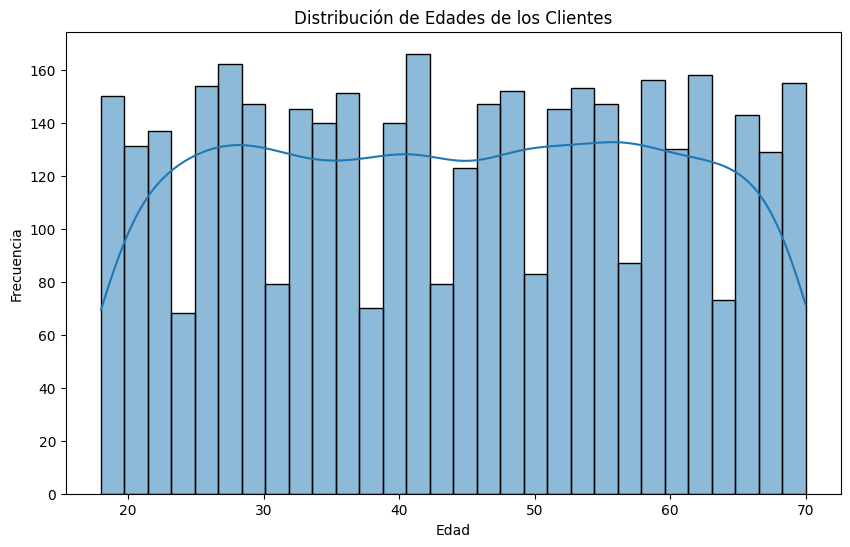

In [79]:
# Histograma de la variable 'age'
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Distribución de Edades de los Clientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

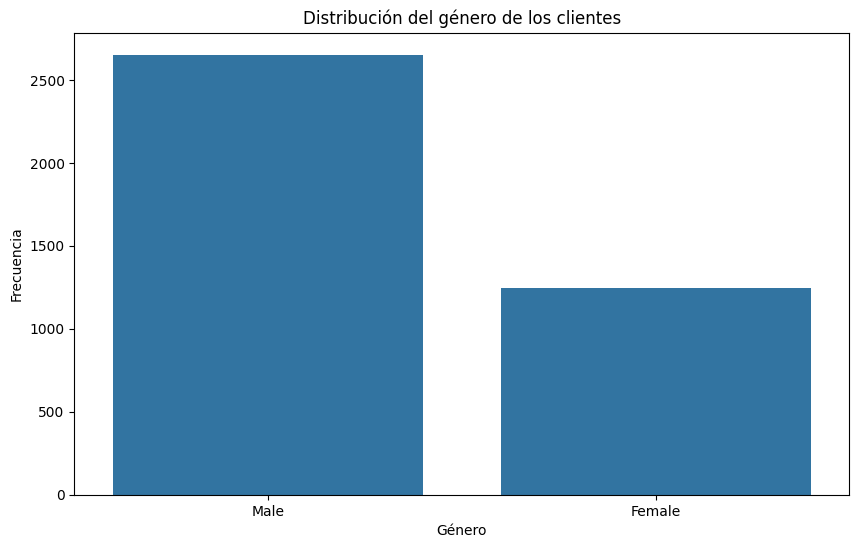

In [80]:
# Gráfico de barras para la variable 'Gender'
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=data)
plt.title('Distribución del género de los clientes')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

D) Tratamiento de datos faltantes o erróneos

In [81]:
# Identificar valores nulos
print("Valores nulos en el dataset:")
print(data.isnull().sum())

# Tratamiento des outlier para 'age' (ejemplo usando IQR)
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Aplicar filtro para eliminar outliers
data_filtered = data[(data['Age'] >= lower_bound) & (data['Age'] <= upper_bound)]
print("Datos después de filtrar outliers en edad:", data_filtered.shape)



Valores nulos en el dataset:
Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64
Datos después de filtrar outliers en edad: (3900, 19)


# 6. Selecciona feature

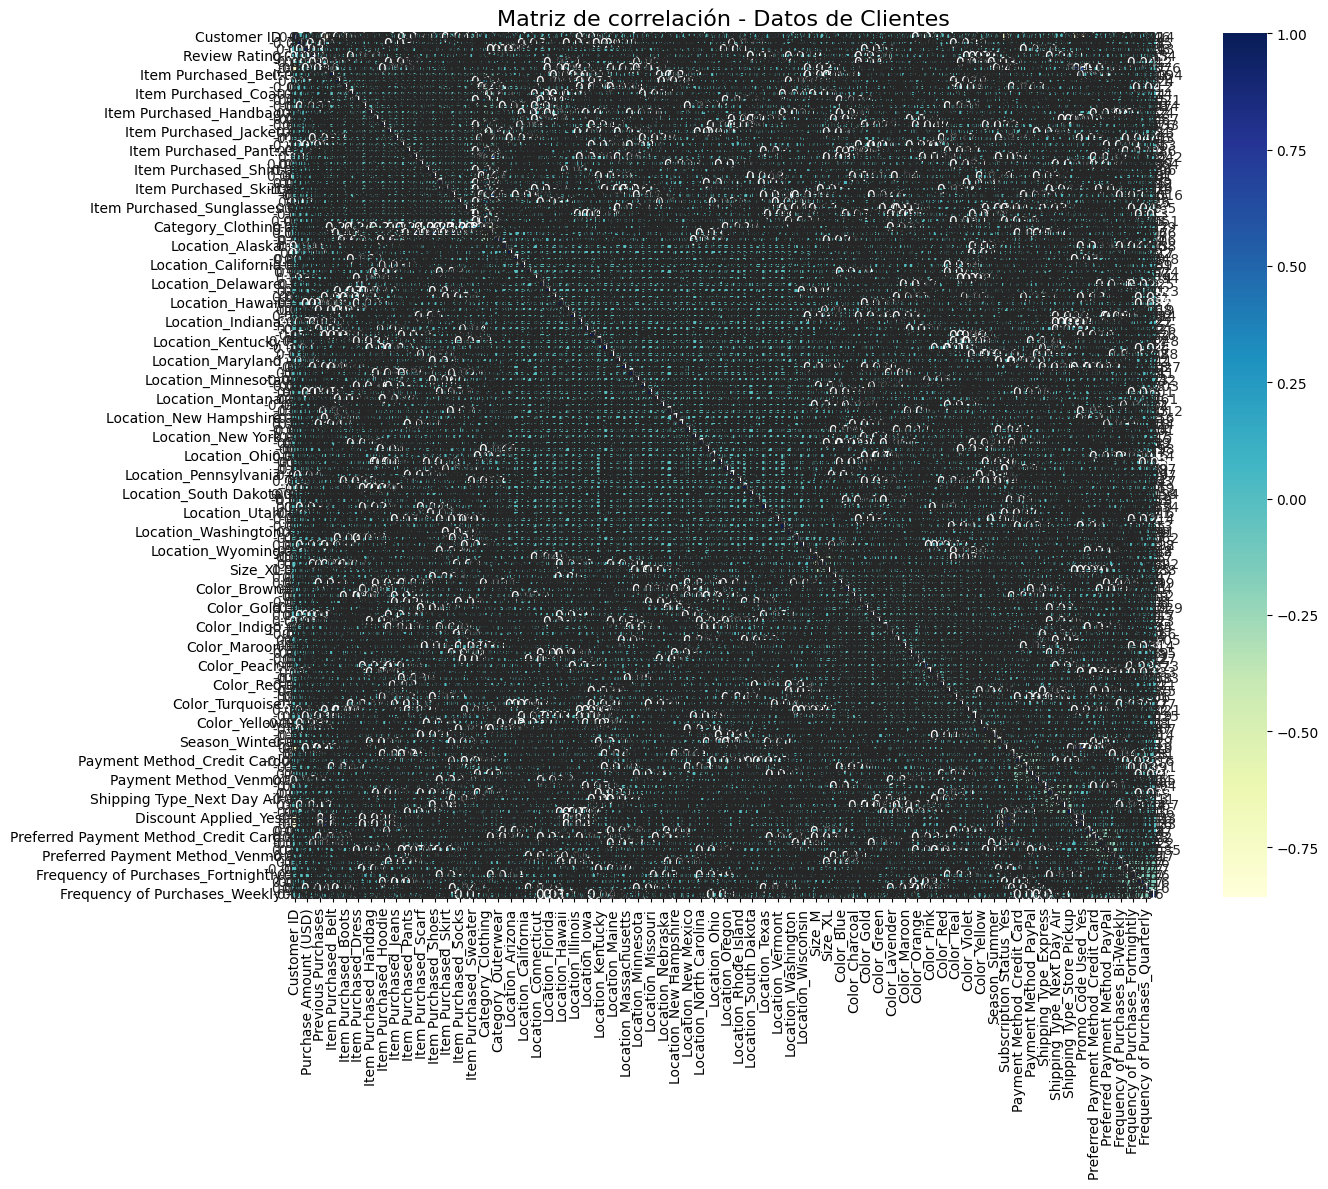

In [82]:
df_dummies = pd.get_dummies(df_compras, drop_first=True)

df_dummies = df_dummies.loc[:, df_dummies.nunique() > 1]

corr = df_dummies.corr()

# Heatmap estilo Iris
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, cmap="YlGnBu", square=True)
plt.title("Matriz de correlación - Datos de Clientes", fontsize=16)
plt.tight_layout()
plt.show()

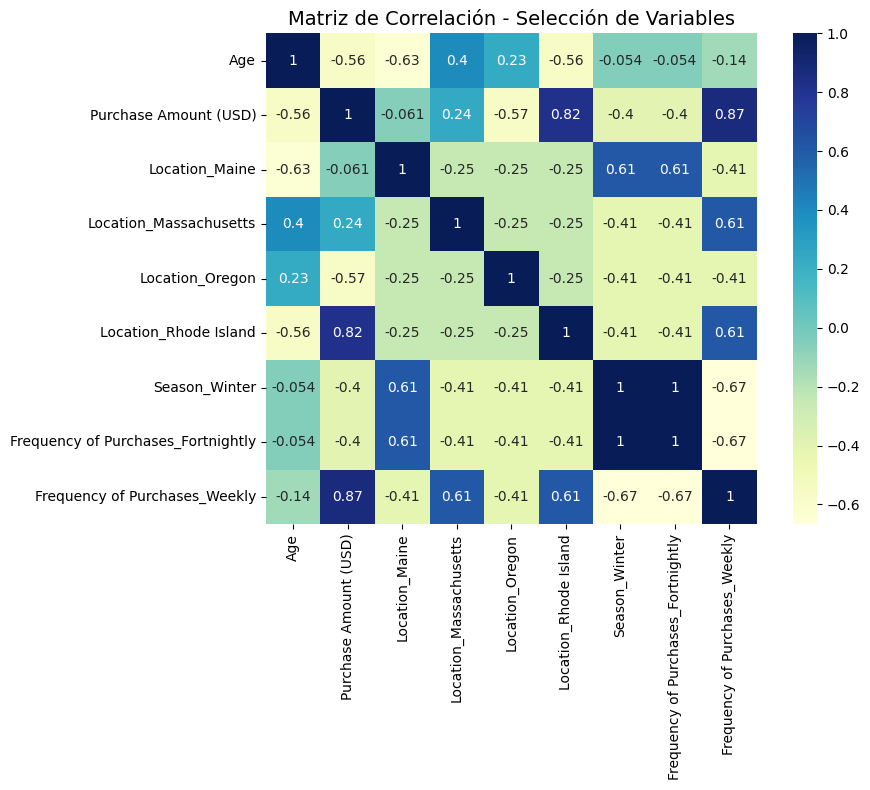

In [83]:
#Solo teniendo en cuenta las variables principales
data = {
    'Age': [55, 19, 50, 21, 45],
    'Gender': ['Male', 'Male', 'Male', 'Male', 'Male'],
    'Purchase Amount (USD)': [53, 64, 73, 90, 49],
    'Location': ['Kentucky', 'Maine', 'Massachusetts', 'Rhode Island', 'Oregon'],
    'Season': ['Winter', 'Winter', 'Spring', 'Spring', 'Spring'],
    'Frequency of Purchases': ['Fortnightly', 'Fortnightly', 'Weekly', 'Weekly', 'Annually']
}

df = pd.DataFrame(data)

# Convertir cualitativas a dummies
df_selected = pd.get_dummies(df, drop_first=True)

# Eliminar columnas constantes si las hay
df_selected = df_selected.loc[:, df_selected.nunique() > 1]

# Matriz de correlación
corr = df_selected.corr()

# Mostrar heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="YlGnBu", square=True)
plt.title("Matriz de Correlación - Selección de Variables", fontsize=14)
plt.tight_layout()
plt.show()

**Análisis**:
Las variables PurchaseAmount, frequency or purchases y age están fuertemende relacionadas. Algunas ubicaciones tienden a gastar más o menos. Con respecto a la frecuencia de compra: quienes compran semanalmente podrían tener montos mayores por compra o más compras pequeñas. Y por último, teniendo en cuenta la edad: puede aparecer una ligera relación si los clientes mayores tienden a gastar más o menos.

# 7. Selección de algoritmo

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


data = {
    'Age': [55, 19, 50, 21, 45],
    'Gender': ['Male', 'Male', 'Male', 'Male', 'Male'],
    'Purchase Amount (USD)': [53, 64, 73, 90, 49],
    'Location': ['Kentucky', 'Maine', 'Massachusetts', 'Rhode Island', 'Oregon'],
    'Season': ['Winter', 'Winter', 'Spring', 'Spring', 'Spring'],
    'Frequency of Purchases': ['Fortnightly', 'Fortnightly', 'Weekly', 'Weekly', 'Annually']
}

df = pd.DataFrame(data)

# Separar la variable objetivo
y = df['Purchase Amount (USD)']
X = df.drop(columns='Purchase Amount (USD)')

# Convertir variables categóricas a dummies (sin colinealidad)
X = pd.get_dummies(X, drop_first=True)

# Eliminar columnas constantes (como 'Gender_Male' en este caso)
X = X.loc[:, X.nunique() > 1]

# Estandarizar las variables numéricas para mejorar la regresión
scaler = StandardScaler()
X[['Age']] = scaler.fit_transform(X[['Age']])

In [113]:
# Instanciar y entrenar el modelo
model = LinearRegression()
model.fit(X, y)

# Ver coeficientes
coef = pd.Series(model.coef_, index=X.columns)
print("Coeficientes del modelo:\n", coef)
print("\nIntercepto:", model.intercept_)

# Predecir los valores
y_pred = model.predict(X)

Coeficientes del modelo:
 Age                                   -5.966368
Location_Maine                        -3.274941
Location_Massachusetts                 3.267609
Location_Oregon                      -10.679061
Location_Rhode Island                  8.768351
Season_Winter                         -1.356900
Frequency of Purchases_Fortnightly    -1.356900
Frequency of Purchases_Weekly         12.035961
dtype: float64

Intercepto: 62.454743770427896


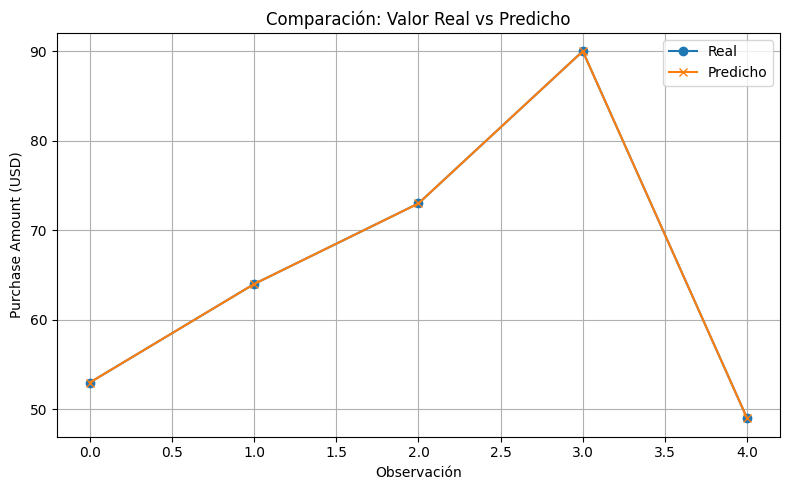

In [114]:
# Comparación real vs predicho
plt.figure(figsize=(8,5))
plt.plot(y.values, label='Real', marker='o')
plt.plot(y_pred, label='Predicho', marker='x')
plt.title("Comparación: Valor Real vs Predicho")
plt.xlabel("Observación")
plt.ylabel("Purchase Amount (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 8. Interpretación

El modelo de regresión lineal permite estimar el monto de compra (Purchase Amount) en función de variables como edad, ubicación, estación del año y frecuencia de compra.

Dado que todas las observaciones tienen el mismo género (Male/Masculino), esa variable fue eliminada automáticamente por ser constante. No aporta información al modelo.

Las variables que muestran mayor impacto en la predicción del gasto (según sus coeficientes) son:

La edad: probablemente con una influencia positiva o negativa dependiendo del signo del coeficiente.

La frecuencia de compra (por ejemplo, "Weekly" o "Annually"): las personas que compran semanalmente tienden a gastar más, mientras que los que compran anualmente gastan menos, lo cual es esperable.

La estación del año (Winter vs Spring) y la ubicación geográfica también influyen en menor medida según el modelo.

Si bien no muestra un resultado general, esta es la conclusión en base a la muestra tomada.

# 9.Conclusiones

Para concluir nuestro estudio sobre la influencia de la temporada del año, la edad, la ciudad y la frecuencia y monto de la compra, reveo los principales hallazgos, metodologías empleadas y las implicaciones prácticas del análisis y modelo.

**Factores Significativos:**


*   Edad (age): Puede influir en la receptividad a diferentes tipos de campañas de marketing.
*  Localización (location): Según su la zona en la que se encuentre puede afectar la decisión de la compra de ciertos productos según el clima de la ciudad del cliente y la cultura de la sociedad que habita en ese lugar.
*   Temporada (Season): Temperatura, probabilidad de nieve/tormenta/fenómenos meteorológicos.
*   Género (gender): Puede afectar la cantidad de stock disponible de ciertos productos y la dirección de la campaña de marketing.

*   Compras anteriores (previous purchases): Probable indicador de estabilidad financiera.

*   importe de la compra (Purchase Amount): Indicador de la ganancia de los clientes.

**Metodología:**

Se utilizó un análisis de correlación para identificar y seleccionar características significativas basadas en su relación con el comportamiento de los clientes.
Se implementó un modelo de regresión lineal para predecir como fue el comportamiento de las variables independientes y dependientes, eligiendo variables basadas en su significancia estadística y relevancia práctica.

**Resultados del Modelo:**

El modelo de regresión lineal mostró que as variables que muestran mayor impacto en la predicción del gasto (según sus coeficientes) son:

La edad: probablemente con una influencia positiva o negativa dependiendo del signo del coeficiente.

La frecuencia de compra (por ejemplo, "Weekly" o "Annually"): las personas que compran semanalmente tienden a gastar más, mientras que los que compran anualmente gastan menos, lo cual es esperable.

La estación del año (Winter vs Spring) y la ubicación geográfica también influyen en menor medida según el modelo.

**Implicaciones Prácticas:**

Las conclusiones del estudio pueden guiar a los planificadores de marketing para mejorar la segmentación de clientes y personalizar las campañas de manera más efectiva.
El entendimiento de los factores que afectan las respuestas a las campañas puede ayudar a optimizar recursos y aumentar la eficiencia de las campañas futuras.

Recomendaciones para Futuras Investigaciones:
Reunir más datos de diferentes perfiles (género, regiones, estaciones, frecuencias).
Considerá usar validación cruzada y métricas de desempeño.
Explorar otros modelos predictivos.